# Fisher's Discriminant Analysis

The sample mean of class $C_i$ is calculated by
\begin{equation}
\boldsymbol{\mu}_i = \frac{1}{N_i} \sum_{\mathbf{v} \in C_i} \mathbf{v}.
\end{equation}
The sample covariance of $C_i$ is defined asas
\begin{equation}
\boldsymbol{\Sigma}_i = \frac{1}{N_i} \sum_{\mathbf{v} \in C_i} (\mathbf{v} - \boldsymbol{\mu}_i) (\mathbf{v} - \boldsymbol{\mu}_i)^T.
\end{equation}

If $M$ is the number of features (in our example $M = 2$), then $\boldsymbol{\mu}_i$ is a vector with $M$ elements and the $j^\textrm{th}$ entry is the mean of the $j^\textrm{th}$ feature of samples in class $C_i$. On the other hand, $\boldsymbol{\Sigma}_i$ is an $M \times M$ matrix. The $(j,j)$ diagonal entry is the variance of the $j^\textrm{th}$ feature of samples in class $C_i$. The variance describes how spread the values of a feature are. The $(j,k)$ off-diagonal entry is the covariance between the $j^\textrm{th}$ and $k^\textrm{th}$ feature of samples in class $C_i$. The covariance describes how much different features influence each other.

Let $\mathbf{w}$ be the direction of the line of projection. The location of the line of projection can be neglected, since it cancels in the calculations. The mean of the projected samples in class $C_i$ is given by $\mathbf{w}^T \boldsymbol{\mu_i}$, while the variance of the projected samples in class $C_i$ is given by $\mathbf{w}^T \boldsymbol{\Sigma}_i \mathbf{w}$.

We seek $\mathbf{w}$ such that
\begin{equation}
\| \mathbf{w}^T \boldsymbol{\mu}_0 - \mathbf{w}^T \boldsymbol{\mu}_1 \|^2 = \mathbf{w}^t (\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)  (\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)^T \mathbf{w}
\end{equation}
is as large as possible. That is the projected means are as far apart as possible. This is known as the between-class scatter of the projected samples. At the same time, we want
\begin{equation}
\mathbf{w}^T \boldsymbol{\Sigma}_0 \mathbf{w} + \mathbf{w}^T \boldsymbol{\Sigma}_1 \mathbf{w} = \mathbf{w}^T (\boldsymbol{\Sigma}_0 + \boldsymbol{\Sigma}_1)\mathbf{w}
\end{equation}
as small as possible, since then the projected samples are close to the projected mean. This is known as the within-class scatter of the projected samples.

This is achieved if $\mathbf{w}$ is a multiple of
\begin{equation}
(\boldsymbol{\Sigma}_0 + \boldsymbol{\Sigma}_1)^{-1} (\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
m = datasets.load_iris()
# We consider two species.
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# We consider sepal length and width, the first and second features.

# Calculate the mean for each species.
mean0 = np.mean(m.data[0:50, 0:2], axis = 0)
mean1 = np.mean(m.data[50:100, 0:2], axis = 0)

# Calculate the covariance for each species.
cov0 = np.cov(m.data[0:50, 0:2].T)
cov1 = np.cov(m.data[50:100, 0:2].T)

# Find the direction of the projection line.
w = np.linalg.inv(cov0 + cov1) @ (mean0 - mean1).T

# Find vector perpendicular to direction.
perp = np.array([w[1], -w[0]])
#perp = [w[1] -w[0]]

# Find midpoint between means.
mid = mean0 + 0.5 * (mean1 - mean0)

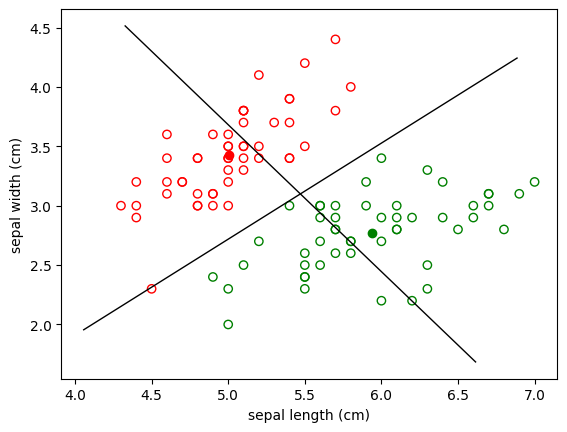

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
fig, ax = plt.subplots()
# Plot data.
scatter = ax.scatter(m.data[0:100, 0], m.data[0:100, 1],
                     facecolors = 'none',
                     edgecolors = colours[0:100])
ax.set(xlabel=m.feature_names[0], ylabel=m.feature_names[1])
# Plot means.
ax.scatter(mean0[0], mean0[1], c='r')
ax.scatter(mean1[0], mean1[1], c='g')
# Plot projection line.
temp1 = mid + 0.2 * w
temp2 = mid - 0.2 * w
plt.plot([temp1[0], temp2[0]], [temp1[1], temp2[1]],
         c = 'k', linewidth =1)
# Plot separation line.
temp1 = mid + 0.2 * perp;
temp2 = mid - 0.2 * perp;
plt.plot([temp1[0], temp2[0]], [temp1[1], temp2[1]],
         c = 'k', linewidth =1)
plt.show()